In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import edhec_risk_kit as erk
import yfinance as yf
import seaborn as sns
from datetime import date
from pandas_datareader import data
import work as work
import investpy

import plotly.express as px
import plotly.graph_objects as go
import plotly

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.core.display import display, HTML


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#data = work.updated_world_indices(category = 'All', timeframe='Weekly')
#hmap = data[0]
#rawdata = data[1]
#rawdata.to_excel('rawdata.xlsx', sheet_name='Equities')

# Weekly Global Market Report


<div style="font-size: 15px">
<br>
    <b> Date: </b>  28<sup>th</sup> November, 2020
</div>

<a id ="content"></a>
## Contents:

1. [World Equities](#eq)
2. [Fixed Income](#fi)
3. [Currencies (FX)](#cur)
4. [Commodities](#comd)
5. [Charts of the Week](#charts)
6. [Key Economic Events - Next Week](#eco)

# World Equity Markets Heatmap

In [3]:
rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
def world_map(timeperiod):
    """
    """
    iso = pd.read_excel('World_Indices_List.xlsx', sheet_name='iso')
    iso.set_index('Country', inplace=True)
    rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
    rawdata = rawdata.drop(['China A50', 'SmallCap 2000', 'BSE Sensex', 'Euro Stoxx 50', 'Nasdaq 100', 'KOSDAQ', 'RTSI', 'DJ Shanghai', 'SZSE Component'], axis=0)
    data2 = rawdata.merge(iso['iso_alpha'], on='Country')
    data2[['Chg (%)', 'Chg YTD (%)', '$ Chg (%)','$ Chg YTD (%)']] = data2[['Chg (%)', 'Chg YTD (%)', '$ Chg (%)','$ Chg YTD (%)']].round(4)*100

    df = data2
    for col in df.columns:
        df[col] = df[col].astype(str)

    df['text'] = 'Return: '+df[timeperiod]+'%' + '<br>' \
                  'Country: '+ df['Country'] + '<br>' \

    fig1 = go.Figure(data=go.Choropleth(locations=df['iso_alpha'], z=df[timeperiod].astype(float).round(2), colorscale='RdYlGn', autocolorscale=False,
        text=df['text'], colorbar_ticksuffix = '%', colorbar_title = "Return", zmax=6, zmin=-3))



    return fig1.update_layout(width=950, height=500, margin=dict(l=0,r=0,b=0,t=0,pad=1),
                        xaxis=dict(scaleanchor='x', constrain='domain'), coloraxis_colorbar_x=1)

style = {'description_width': 'initial'}
interact(world_map,
             timeperiod = widgets.Dropdown(options=(('Weekly LCL Returns', 'Chg (%)'), ('YTD LCL Returns', 'Chg YTD (%)'),
                                                ('Weekly USD Returns', '$ Chg (%)'), ('YTD USD Returns', '$ Chg YTD (%)')),
                                                value = '$ Chg (%)', style=style, description='Return Category: '));

interactive(children=(Dropdown(description='Return Category: ', index=2, options=(('Weekly LCL Returns', 'Chg …

<a id ="eq"></a>
## World Equities

### Local Currency & USD Performance (Weekly & YTD)
*Data is sorted by Weekly USD Performance (%)

In [4]:
rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
def hmap(sortby):
    hmap = rawdata.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}",'Chg': "{:.2f}", 'Chg (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}", '$ Chg (%)': "{:.2%}", '$ Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)', 'Chg', 'Country'], axis=1).columns))
    return hmap
    
style = {'description_width': 'initial'}
interact(hmap,
             sortby = widgets.Dropdown(options=(('Weekly LCL Returns', 'Chg (%)'), ('YTD LCL Returns', 'Chg YTD (%)'),
                                                ('Weekly USD Returns', '$ Chg (%)'), ('YTD USD Returns', '$ Chg YTD (%)')),
                                                value = '$ Chg (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', index=2, options=(('Weekly LCL Returns', 'Chg (%)'), (…

**HIGHLIGHTS**:

- **Wall Street** finished higher in thin post-holiday trading, with the S&P adding 9 points to a record 3,638, the Nasdaq 111 points to a record high of 12,206 and the Dow Jones gaining 38 points to 29,910. On the week, both the S&P 500 and the Dow booked a 2.2% gain and the Nasdaq surged 2.9%. Retailers were among the top performers amid hopes of strong Black Friday sales.  US stocks were buoyed earlier of this week by President-elect Joe Biden’s transition news alongside vaccine optimism. A key federal government agency gave a go-ahead for Biden to begin [transitioning into the White House](https://www.bbc.com/news/election-us-2020-55096851) while the president-elect’s office also announced candidate picks for major cabinet positions, chief being the planned nomination of former [Fed Chair Janet Yellen as the next Treasury Secretary](https://indianexpress.com/article/explained/who-is-janet-yellen-bidens-pick-to-head-the-us-treasury-department-7066072/). Biden also dropped a number of other Obama-era names for his upcoming Administration, including [former Secretary of State John Kerry as his climate tsar](https://indianexpress.com/article/explained/john-kerry-joe-biden-climate-envoy-7064182/). Meanwhile, more than 110K coronavirus infections were recorded on Thursday, the lowest in near 2 weeks although the [number of hospitalizations hit a record of at least 90,481](https://deadline.com/2020/11/u-s-covid-hospitalizations-top-90000-for-first-time-thanksgiving-marks-33rd-consecutive-record-day-1234622590/).


- Both the stocks and bond markets were closed on Thursday for Thanksgiving holiday. [Gold prices fell](https://in.reuters.com/article/global-precious/precious-gold-dives-below-key-1800-threshold-in-technical-sell-off-idUSL4N2ID38E) despite weaker dollar and [oil prices managed to gain](https://in.reuters.com/article/global-oil/oil-drops-as-rally-fizzles-out-on-supply-concerns-vaccine-doubts-idINKBN2870GF?il=0) on the back of positive sentiment earlier of the week before pulling back on Thursday. The [Federal Reserve’s latest meeting minutes](https://www.cnbc.com/2020/11/25/fed-releases-minutes-from-november-meeting.html) showed the central bank’s intention to alter or enhance its current bond-buying or quantitative easing (QE) program. It says that “many participants judged that the Committee might want to enhance its guidance for asset purchases fairly soon”.


- Alternative, high-frequency data show that economic activity in several of the world’s largest advanced economies slid at the end of November. This reflected a surge in the rate of Covid-19 infections and stricter containment measures. After a temporary period of stability in European economies earlier this month, activity slowed again in Germany, Italy, Spain and France. Activity in the U.S. and Canada continued to move sideways in the last week of November. Japan is the only bright spot among advanced economies. Activity held steady at more than 90% of its pre-virus level -- reflecting a large measure of success in controlling the virus.


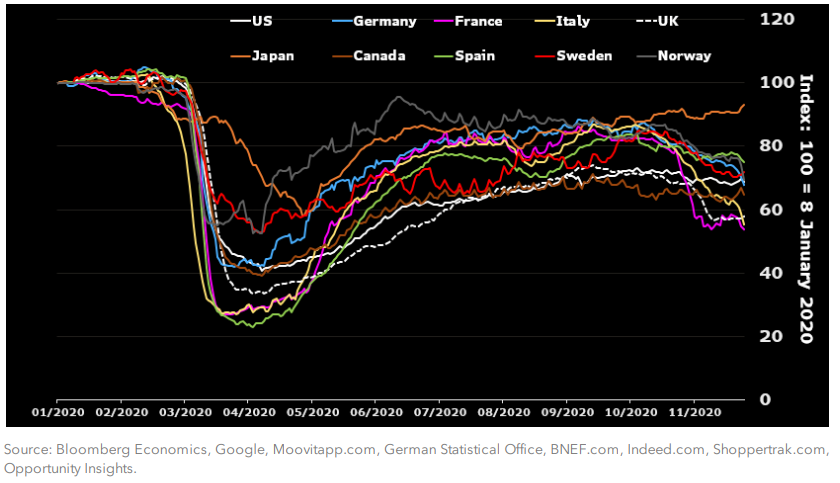

- **European equities** closed slightly higher in muted trading on Friday, with Frankfurt's DAX 30 gaining 0.4% to end at 13,336, its highest level since February 21st. Data showed the [Eurozone economic sentiment indicator](https://www.bloombergquint.com/global-economics/euro-area-economic-confidence-slumps-amid-new-virus-restrictions) fell less than expected in November, while [third-quarter GDP figures for France were revised higher](https://www.indiainfoline.com/article/capital-market-commodity-futures-mid-session-commentary/economic-buzz-french-gdp-growth-revised-higher-at-18-7-in-september-quarter-120112700488_1.html). Meanwhile, EU Brexit negotiator Michel Barnier confirmed he is traveling to London tonight to continue [face-to-face trade talks this weekend](https://www.bbc.co.uk/news/uk-politics-55090861). On a more negative note, investors remained concerned about coronavirus-induced restrictions as [Germany extended its lockdown until December 20th](https://www.hindustantimes.com/travel/germany-extends-covid-19-lockdown-until-december-20-limitations-of-social-contacts-until-january/story-LX53RNr5CEQJsu63TrJ0zK.html) and France tightened rules for the hospitality sector until January 20th. At the same time, [Hungary and Poland pledged to maintain their veto of the EU's budget and the pandemic relief fund](https://www.euronews.com/2020/11/26/hungary-and-poland-maintain-united-front-blocking-eu-covid-19-recovery-fund), according to a joint statement released on Thursday. For the week, the DAX 30 gained 1.5%.



- The IBEX 35 (**Spain**) climbed 1.1% to 8,191 on Friday, the highest since March 6th and booking a 2.7% weekly gain. Banco BBVA was among the top performers, up over 4% while Sabadell was down more than 12% after [merger talks between the two lenders ended after the companies failed to agree on financial terms](https://www.bloomberg.com/news/articles/2020-11-27/bbva-sabadell-end-takeover-talks-in-disagreement-over-price). On the economic data front, recent figures showed business confidence improved to a nine-month high in November while [retail sales fell for the eighth consecutive month in October but at the softest pace](https://in.reuters.com/article/uk-spain-economy-salesfigures/spain-retail-sales-fall-2-7-in-october-from-october-2019-idUKKBN2870PS) in the current sequence. Meantime, Spain reported 12.3 thousand new Covid-19 infections on Thursday, up from 10.2 thousand the day before. Meanwhile, the FTSE MIB (**Italy**) advanced 3% in the last week of November, extending a 3.8% gain in the previous week.


- The CAC 40 (**France**) rose 0.6% to 5,598 on Friday, the highest since February 26th after the latest data showed the economy rebounded faster than initially thought in Q3 and [household consumption grew more than expected in October](https://think.ing.com/articles/france-household-confidence-hits-bottom-in-november-december-should-be-better/). Also, [consumer prices rebounded in November](https://www.actionforex.com/live-comments/343671-france-gdp-grew-18-7-in-q3-consumer-spending-rose-3-7-mom-in-oct/). The CAC 40 gained about 2% in the last week of November. On the coronavirus front, France tightened rules for hospitality until January 20th despite hospitalizations fell to 10,666 on Thursday from 11,420. On the corporate front, [Electricite gained](https://www.marketscreener.com/quote/stock/ELECTRICITE-DE-FRANCE-4998/news/Electricite-de-France-EDF-Shares-Jump-on-Restructuring-Plan-Nuclear-Price-Reform-News-31877510/) amid reports that France and the EU are close to agreeing on nuclear regulations.


- The FTSE 100 (**UK**) cut early losses to close 0.1% higher at 6,368 on Friday, as hopes of a post-Brexit trade deal provided some support after EU negotiator Michel Barnier confirmed he was travelling to London to [continue face-to-face talks](https://www.express.co.uk/news/politics/1365657/Michel-Barnier-Brexit-news-EU-UK-trade-talks-no-deal-fishing-latest-video-vn) this weekend. Earlier in the session, concerns over negotiations mounted as Barnier reportedly said that he was not able to say yet whether a new post-Brexit trade deal would be ready in time. Meanwhile, news of tougher [tiered restrictions for England](https://www.theguardian.com/world/2020/nov/27/tier-2-lockdown-rules-in-england-the-latest-covid-restrictions-explained) weighed on sentiment as only 1% of the population will be granted light restrictions after the national lockdown ends on December 2nd. For the week, the FTSE 100 added 0.3%.



**EURO AREA PMI DATA UPDATE**

> The composite PMI survey for the **Euro Area** dropped sharply in November. The sectoral reading confirms services are bearing the brunt of the shock. Services PMI fell to 41.3 from 46.9 in November. The manufacturing sector remained in expansionary territory, with a modest slowdown to 53.6 from 54.8. These readings signal that, in contrast with the first lockdown, the impact should remain mostly contained to industries directly impacted by containment measures, in particular the hospitality and recreation sectors. 



> In the **U.K.**, the flash composite PMI reading for November fell to 47.4 from 52.1 in October. Bloomberg expected a fall to 40, while consensus centered on 42.5. The services measure dropped to 45.8 (BE: 40, consensus: 43) from 51.4. The manufacturing PMI rose sharply to 55.2 (BE: 50, consensus: 50.5), compared with 53.7 in October. The divergence between the fortunes of the manufacturing and services sector reflects the nature of the lockdown in England. Non-essential retail, hospitality and recreation services were all shut while the factory sector remained open. The manufacturing sector also got a boost from pre-Brexit related stockpiling, according to the survey.




- The ASX 200 (**Australia**) fell 0.53% to 6601.10 on Friday, extending declines of 0.7% in the previous session while gaining for the 4th consecutive week and remaining on track for the best November on record, surging 9.01%. Sentiment was dampened by news that [Beijing had decided to impose anti-dumping deposits on Australian wine](https://www.aljazeera.com/economy/2020/11/27/china-to-hit-australian-wines-with-anti-dumping-measures) as a temporary measure. Energy, mining and financial stocks were all headed for a fourth straight weekly gain, while gold stocks were set for their biggest monthly loss since March. On the coronavirus front, Australia’s second-largest state, Victoria, once the country’s COVID-19 hotspot, said on Friday it has gone [28 days without detecting any new infections](https://in.reuters.com/article/us-health-coronavirus-australia/once-australias-covid-19-hotspot-victoria-goes-28-days-without-an-infection-idUSKBN2862IU), a benchmark widely cited as eliminating the virus from the community. The state also has zero active cases after the last COVID-19 patient was discharged from hospital this week, a far cry from August when Victoria recorded more than 700 cases in one day and active infections totalled nearly 8,000.


- The Nikkei 225 (**Japan**) added 0.4% to 26644.71 on Friday, trading at levels not seen for 30 years while closing 4.28% higher for the week and 13% for the month. Investors turned positive as profits at China’s industrial firms gained for the sixth consecutive month in October, gaining at the quickest pace since early 2017 and [surging 28.2% year-on-year](https://www.reuters.com/article/us-china-economy-industrial-profits/chinas-industrial-profits-grow-at-quickest-monthly-pace-since-early-2017-idUSKBN28704B). In local data, the [core consumer price index fell 0.7% in November from a year earlier](https://in.reuters.com/article/japan-economy-inflation-idINL4N2IC3WE), suffering their biggest annual drop in more than eight years as the hit to consumption from the coronavirus crisis continued to heap deflationary pressure on the economy. Meantime, novel coronavirus infections rates continue to [surge across Japan](https://www.deccanherald.com/international/hong-kong-beat-back-coronavirus-again-and-again-and-again-920822.html), as the president of the Japan Medical Association, Nakagawa Toshio, expressed a strong sense of alarm earlier this week, noting that medical care systems were nearing collapse in many parts of the country.

**EMERGING MARKETS**

> Excluding China, emerging-market activity was about 18% below its pre-virus level in the last week of November -- widening the gap with advanced economies. 

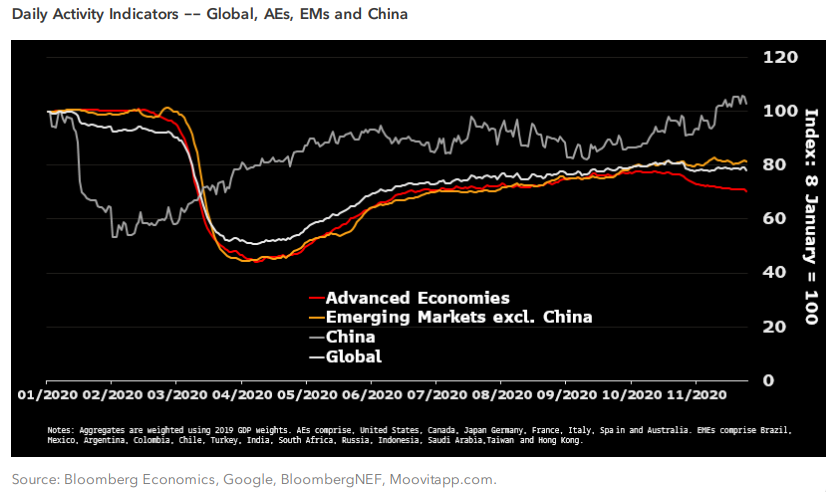

> Trends at the country level are diverging. **China and Brazil have made the most progress, followed by Russia and more recently Colombia and Mexico**. Alt-data suggests that economic activity in Turkey has sharply decelerated in the past two months. The recovery in Indonesia, Argentina and Chile remains sluggish and was about 35% below its pre-Covid level at the end of November.

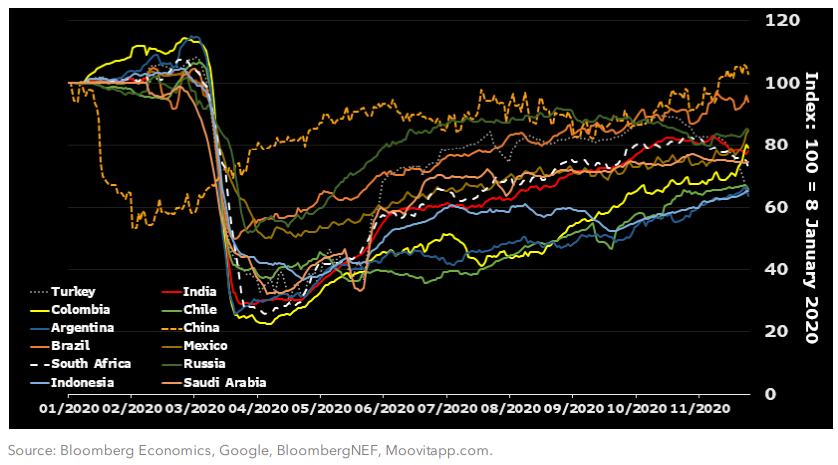



- **MEXICO’s IPC** lost 1.7% 41,674. On Friday, [data from INEGI](http://www.xinhuanet.com/english/2020-11/28/c_139548301.htm) showed that exports increased in October 2.9% on an annual basis nudged by a 12.8% jump in auto sales, while imports declined 13.8% yoy dragged by a 34.4% plunge in consumption goods. [Mexico's GDP rebounded 12.1% in the 3Q 2020](https://www.thestar.com.my/news/world/2020/11/27/mexico039s-gdp-rebounds-121-pct-in-q3) compared to the previous quarter, the National Institute of Statistics and Geography (INEGI) reported Thursday. GDP growth from July to September followed an unprecedented 17% drop in the second quarter. Annual inflation slowed to 3.43% in mid-November, less than expected by all analysts in a Bloomberg survey, and below the ceiling of the target range. During the week, the IPC closed flattish.


- **BRAZIL**’s gained 0.3% to 110,576 and hit a high since the last week of February, extending gains for the fifth straight session. During the week, the Ibovespa jumped 4.2%. On the domestic side, data from the FGV showed consumer confidence index fell 0.7 points to 81.7 points in November, a second straight decline following a run of five increases from April's record low 58.2, and slipping further back from the pre-pandemic level of 87.8 in February. Annual inflation accelerated to 4.22% in mid November, above the official target, amid higher prices for food and transportation. Meanwhile, the [unemployment rate went up to a fresh record high of 14.6%](https://www.reuters.com/article/us-brazil-economy-employment/brazils-unemployment-rate-rises-to-record-high-14-6-in-quarter-through-september-idUSKBN2871CI) in the third quarter of the year amid the coronavirus crisis. On the corporate side, XP Inc said that it began studies on possible corporate structures after Itaú Unibanco announced a spin-off of its stake in the brokerage into a separate company.


- The **SOUTH AFRICA** FTSE/JSE All Share Index edged down 0.2% to 57882.5 on Friday, remaining near close levels not seen since February and booking a 2.1% gain on the week as prospects of a working coronavirus vaccine improved investors' risk appetite. Meanwhile, JPMorgan Chase & Co said it may be [time to drop gold and tech stocks and buy into South Africa’s domestically focused stocks](https://www.bloomberg.com/news/articles/2020-11-27/jpmorgan-favors-south-african-domestics-over-gold-tech-stocks). On the coronavirus front, South African Health Minister said that government will discuss additional lockdown restrictions to control the resurgence of coronavirus. On the political front, President Cyril Ramaphosa is set to face the first motion of no confidence in his leadership in Parliament next week, which was filed by the African Transformation Movement (ATM) earlier this year before lockdown began.


In other EM developments,


- **South Korea**’s stocks hit a record high as improving trade data and the earnings outlook boosted investor confidence; early trade data showed exports extending their recovery in November. Household debt rose 2.7% to 1,682.1 trillion won in the third quarter, the fastest pace since 2016. The **nation’s exporters see the won as too strong** and cited currency volatility as one of their key concerns for next year, according to a trade group survey.


- **Indonesia** is planning to shorten the duration of the year-end holiday to avoid mass gatherings suspected of triggering a recent spike in cases. The country’s lenders are pushing back against central-bank pressure to further lower interest rates for their customers. Indonesia’s central bank will stay focused on supporting economic growth, even as inflation is expected to remain low due to weak demand, Governor Perry Warjiyo said. Indonesia’s tax collections from the production sectors are still “under deep pressure” amid the pandemic, Finance Minister Sri Mulyani Indrawati said.


**ECONOMIC DATA WATCH**


- Preliminary PMI readings for major economies were mixed again in November with both services and manufacturing gauges inching upwards in the US but retreating in the Eurozone and Japan. The readings diverged in the UK where manufacturing unexpectedly advanced and services fell to contraction level. Most data came from the US this week and overall data painted a mixed outlook of the economy. Initial jobless claims rose for the second consecutive week, US 3Q GDP growth was unrevised at annualised 33.1% QOQ. Consumer spending rose but personal income fell; consumer sentiment weakened according to both Conference Board and University of Michigan sentiment indexes. Regional manufacturing gauges generally moved lower while durable goods and core capital orders posted growths. Housing sector data remained robust in general. Goods imports rebounded alongside slower exports, leaving a wider trade deficit. Elsewhere, China industrial profits soared while Hong Kong trade data weakened; Singapore industrial output declined. Malaysia CPI fell for straight eighth month.


**DATA RELEASES NEXT WEEK**


- A series of key data are due in the week ahead. Monday begins with the release of Japan industrial production and retail sales figures, followed by New Zealand business sentiment and more importantly China official PMI data. Second-tiered US data (MNI Chicago PMI, pending home sales and Dallas Fed Manufacturing Index) are out in the evening.


- Tuesday will see the release of manufacturing PMIs for all the key economies. Other than that, there are also Japan’s job numbers, Hong Kong retail sales, Eurozone HICP inflation and US construction spending. 


- On Wednesday, Australis 3Q GDP is expected to command market’s attention followed by the Eurozone unemployment data and US ADP private payrolls figures. 


- On Thursday, the US Federal Reserve published its last Beige Book of the year. Apart from all the services PMI, key data include Australia exports, Eurozone retail sales and US initial jobless claims. 


- Last but not least on Friday, Australia and Singapore retail sales are up in the day, followed by US nonfarm job report, trade balance and factory orders at night.

**STOCKS THAT DEFINED THE WEEK**


**SALESFORCE.COM (CRM)**

-  Which business-software giant will become the go-to provider in a work-from-home world? Salesforce could put pressure on Microsoft Corp., as it is in advanced talks to buy workplace messenger maker Slack Technologies Inc. Having failed to capture Slack itself, Microsoft in 2016 launched its own competing workplace collaboration tool, called Teams. Slack would be the largest acquisition ever for Salesforce ; Salesforce’s core business is in customer-relationship management software. Salesforce shares lost 5.4% Wednesday.

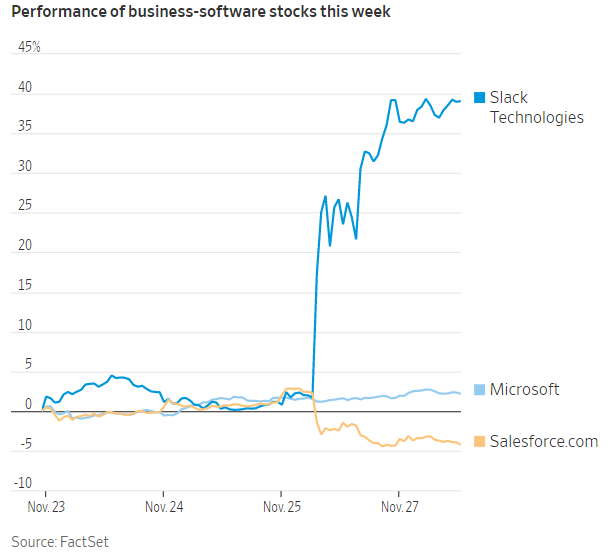

**BEST BUY CO.**

- Christmas came early at Best Buy. The big-box retailer continued benefiting from online sales and items that support homebound customers during the coronavirus pandemic but warned that those gains will taper off. The retailer booked strong sales in the early weeks of November, helped by orders of the new PlayStation and Xbox consoles, and from early Black Friday deals that began in mid-October. But product shortages remain a challenge for the company in the face of high demand, particularly in categories such as large appliances and computing, executives said. Best Buy shares fell 7% Tuesday.


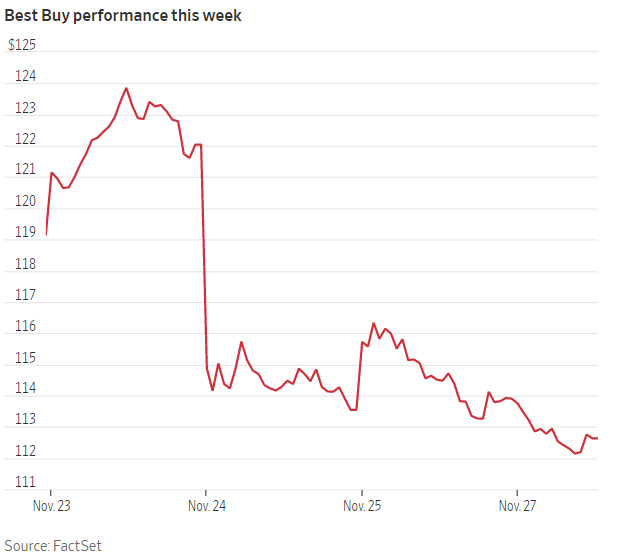

**EXXON MOBIL CORP.**

- Oil expectations are sliding inside Exxon. Internal documents show the company has lowered its outlook for crude prices for each of the next seven years by 11% to 17%, according to the documents. This is due to the fallout from the pandemic-fueled drop in demand, as well as increased competition from renewable-energy sources and the prospect of increased global climate-change regulation. Exxon is struggling to cover its dividend, USD 15 billion a year, at current oil prices, taking on debt this year to do so. So far it has maintained the payout, unlike rivals including Royal Dutch Shell PLC and BP PLC, which have cut their dividends amid this year’s cash crunch. Exxon shares fell 2.8% Wednesday.

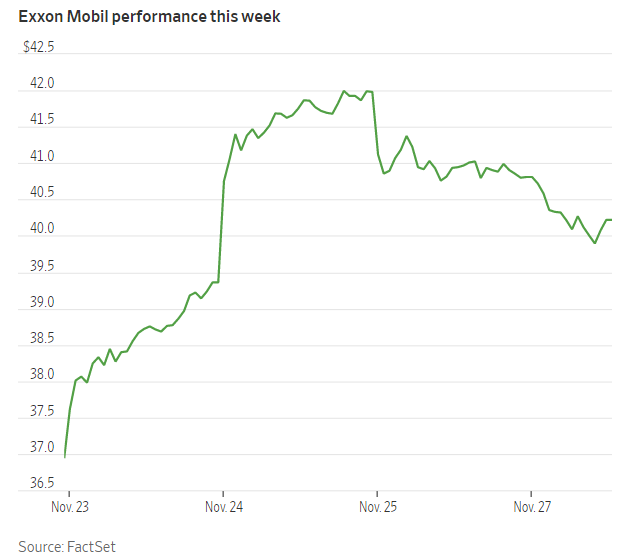

**GAP INC.**

- Gap is betting that stuck-at-home shoppers are ready to spend big on clothes. The apparel retailer’s sales in the recent quarter rebounded from spring shutdowns, but increased marketing weighed on profits. The company, whose brands include Old Navy and Banana Republic, warned that the recent increase in Covid-19 cases could hurt store traffic during the critical holiday shopping period. But Chief Executive Sonia Syngal on Tuesday told analysts she was optimistic that housebound customers who can no longer splurge on travel or events may shift their spending to apparel and other products. Gap shares lost 20% Wednesday.

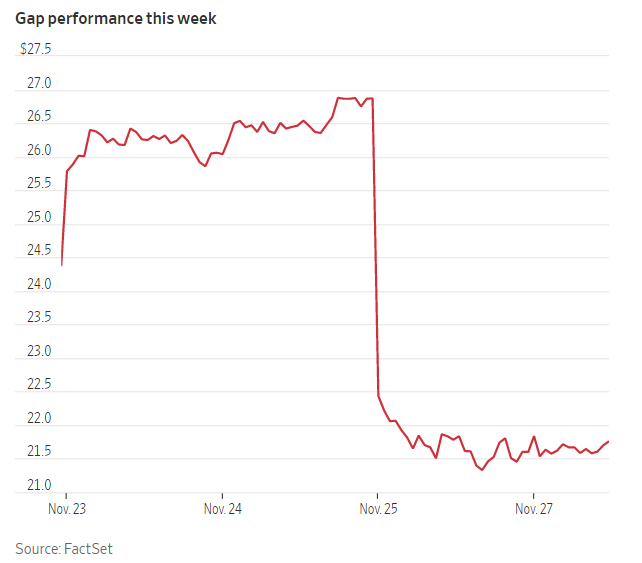

[Back to Table of Contents](#content)

<a id ="fi"></a>
## FIXED INCOME

**HIGHLIGHTS**


- The week under review saw US Treasuries slightly pressured despite concerns over restriction in economic activities and rise in COVID-19 infections. Overall benchmark yields rose between 0-7bps across the curve with the longerends pressured the most. The curve bear steepened as the 2Y benchmark; reflective of interest rate predictions ending unchanged at 0.16% whilst the muchwatched 10Y (which traded within a tighter 0.82%-0.88% range); spiked 5bps at 0.88%. President-elect Biden was allowed to start talking to federal agency officials and prepare to move into the White House and is also set to nominate former Fed Chair Janet Yellen as US Treasury Secretary. Meanwhile ongoing cross currents persist with still high COVID-19 cases and more stringent lockdowns, against increasingly promising vaccine news. Expect bonds to continue to possibly range sideways next week.


- The minutes from the last meeting of the European Central Bank’s Governing Council show policymakers have become more pessimistic on the inflation outlook, as the coronavirus lingers in Europe. Those concerns are almost certain to prompt additional monetary stimulus in December. The inflation outlook is worse than when the size of the Pandemic Emergency Purchase Programme was last increased. The efficacy of targeted longer-term refinancing was highlighted in the discussion.


**Elusive Price Increases**

> The inflation outlook has deteriorated more than the ECB was expecting. “The view was expressed that the probability that inflation rates would be close to the severe scenario included in the September staff projections was increasing, even if no additional negative surprises were to materialise,” the minutes stated. And the Governing Council is increasingly concerned about the weakness in inflation persisting. “It was pointed out that 35% of all items were currently posting negative growth rates and underlying prices pressures were also weak, raising concerns over a lasting impact,” the record showed.

**Weakness in Inflation Becomes More Widespread**

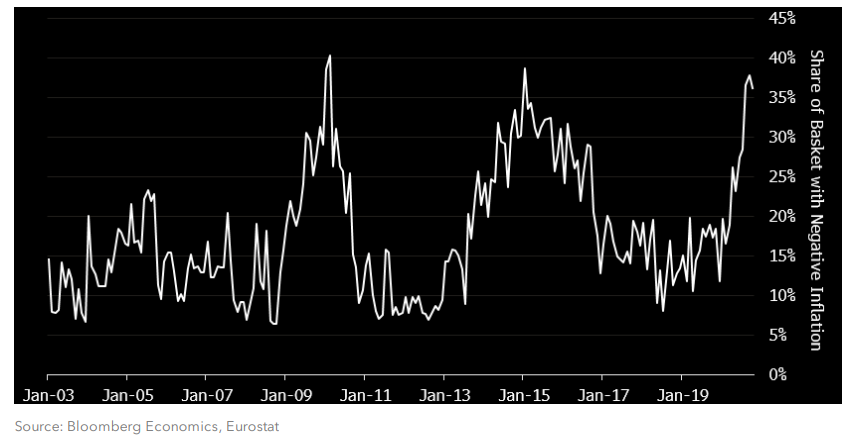

> The minutes reiterated the message broadcast loudly and clearly by Lagarde at her last press conference: the Governing Council will recalibrate all of its instruments in December, when the updated staff forecasts are available. That message nearly ensures more monetary stimulus will be announced next month. However, Lagarde has since been more than clear about which instruments will be focused on. “While all options are on the table, the PEPP and TLTROs have proven their effectiveness…(and) are therefore likely to remain the main tools for adjusting our monetary policy,” she said in a speech on Nov. 11. Bloomberg Economics forecasts an expansion of PEPP purchases by 450 billion euros to 1.8 trillion euros next month.


- November has already been a strong month for risk markets thanks to the positive vaccine news. In developed markets, global high yield and investment grade have returned 3.9% and 1.7% for the month to date, as of 24 November. Emerging market corporates have posted returns of 2.4%, while sovereign hard and local currency debt have returned 3.8% and 1.1% respectively. Corporate bond supply has been elevated this year, yet strong demand factors have allowed for continued spread compression. November’s fund flow picture is distinct in that riskier asset classes have been the benefactors, while safer asset classes/products, such as money market funds and government bonds, have witnessed significant outflows. Within the funds themselves, beta exposures suggest that positioning has moved to a risk-on bias, not just by rotating into cyclical names but also by dipping down in credit quality. For example, US CCC rated securities have outperformed BBs by 3.5% in the month to date.




 
**Fund flows in November have been geared towards riskier asset classes**

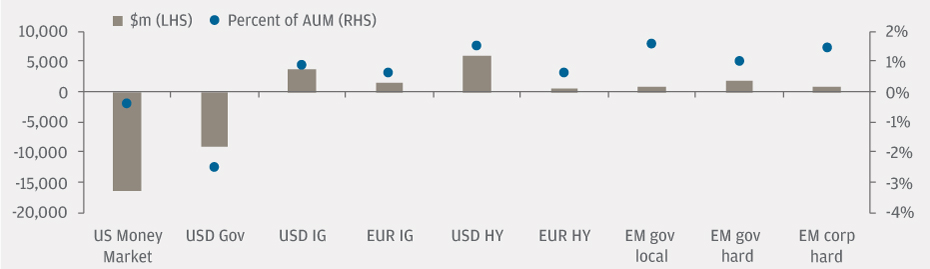

*Source: J.P. Morgan Asset Management; data is for the month to date, as of 23 November 2020. Gov = government, IG = investment grade, HY = high yield, local = local currency, hard = hard currency, corp = corporate. AUM is assets under management. LHS = left hand side. RHS = right hand side.

**CENTRAL BANKS AND RATES ACTION**



- **Peru sold USD 4 billion of bonds, including securities coming due in 100 years**, just days after political turmoil gripped the country in the wake of former President Martin Vizcarra’s impeachment. The century bonds were sold at the [lowest yield for an emerging-market government ever of 3.3%](https://www.barrons.com/articles/peru-just-issued-a-100-year-bond-is-that-a-good-investment-51606310928). Meanwhile, Colombia’s government estimates the economy will rebound 11.8% in 2021, after an estimated contraction of 6.8% this year, Finance Minister Alberto Carrasquilla said. The central bank left its key interest rate unchanged at 1.75% as the strong recovery from the coronavirus slump suggests the economy may not need extra stimulus.


- **Turkey**’s central bank raised the amount of lira and FX deposits that commercial lenders must park at the monetary authority, according to a decree published in the Official Gazette. The country is lengthening its bond maturities on foreign and local markets as it seizes on investor optimism after President Recep Tayyip Erdogan’s economic revamp earlier this month. **Kenya**’s central bank held its key interest rate for the fifth straight meeting as the impact of the coronavirus pandemic in East Africa’s largest economy started easing in the second half of the year.


- **Oman**, one of the weakest sovereigns in the Gulf Arab region, returned to the dollar debt market as a rally in its bonds that were issued about a month ago enabled it to lock in cheaper rates. Dubai’s government raised USD 1.5 billion by reopening existing debt instruments, data compiled by Bloomberg show. The United Arab Emirates abolished the need for companies to have Emirati shareholders, local media reported, in a major shake-up of foreign ownership laws aimed at attracting investment into an economy reeling from the coronavirus and a decline in oil prices.

[Back to Table of Contents](#content)

<a id ="cur"></a>
## Currencies (FX)

In [5]:
ccy = pd.read_excel('World_Indices_List.xlsx', sheet_name='Currencies', header=0)
ccy_data = yf.download(list(ccy['Ticker']), start='2020-01-01', progress=False)
ccy_data = ccy_data['Close'].ffill()

In [6]:
def ccy_perf():
    oned_lcl = pd.concat([(ccy_data.iloc[-1,:]/ccy_data.iloc[-6,:]-1),
                            (ccy_data.iloc[-1,:]/ccy_data.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Ticker'
    oned_lcl = ccy.merge(oned_lcl, on='Ticker')
    oned_lcl= oned_lcl.set_index('Ticker')
    return oned_lcl

ccy = ccy_perf()

In [7]:
def ccy_hmap(sortby):   
    hmap = ccy.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Chg WTD (%)': "{:.3%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(ccy.drop(['Name'], axis=1).columns))
    return hmap
    
interact(ccy_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

In [8]:
def perf_ccy(timeframe):
    weekly_usd = ccy
    if timeframe=='Weekly':
        weekly_usd1 = ccy.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).sort_values(by='Chg WTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'], color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = ccy.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).sort_values(by='Chg YTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'])

    fig.update_layout(title = 'World Currencies ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Ticker: %{x} <br>Name: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_ccy,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS:**

> Expect USD to stay on a gentle downtrend as the prospect of the Fed adding more liquidity if needed should keep a floor below risk assets and the US data-flow may remain mixed. Elsewhere, the OPEC+ meeting could put a cap on oil-sensitive currencies, while GBP is facing another crucial week with Brexit talks. In Australia, the RBA meeting may be a non-event.


- **USD:** The dollar index lost 0.2% to 91.8 on Friday, the lowest on a closing basis since April 29th. On the week, the dollar fell 0.6%, the second consecutive weekly decline and pushing the yearly loss to nearly 5%. The dollar is gently drifting to the lows of the year as investors re-allocate portfolios to recovery trades in the rest of the world. We’ll get some fresh US macro updates in the form of the November employment report and ISM releases. While more lockdown restrictions may stand to curb US equity markets, the prospect of the Fed being prepared to add more liquidity should limit any dollar upside. And given that DXY has fallen in seven of the last ten Decembers, one could favour gentle dollar downside into the end of the year.


- **EUR**: The euro traded slightly higher at 1.193 on Friday, remaining close to an over 12-week high of 1.194, up +0.4% on the week. Local inputs to the EUR story this week come from the EZ flash November CPI, seen still at -0.3% YoY, and a soft October retail sales figure. Neither should detract from the view that the ECB will offer fresh stimulus when it meets on Dec 10th. The simmering threat of a veto of the EU Recovery Fund by either Poland or Hungary has yet to be taken seriously by FX markets (a deal is expected) and the EUR will also take note of any progress on Brexit. In the background, any good Chinese November PMI numbers or any OPEC+ outcome which does not hurt crude oil too badly would probably be greeted well by the trade-sensitive EUR.


- **JPY**: The yen lost 0.4% on the week. USD/JPY has returned to type, with one-month levels of implied volatility drifting back to the 5% area. It is however encouraging to see that USD/JPY continues to trade below 105, despite some reasonably large Japanese buying of foreign bonds according to portfolio flow data. This chimes with the view that the global exodus from the dollar will dominate many FX pairs and that USD/JPY could be headed to the 102 area. Japanese data this week is industrial production and retail sales as well as some jobs data. This typically doesn’t drive the JPY and instead USD/JPY will probably take more notice of whether any fresh US lockdowns (or virus news – good or bad) has much of an impact on global equity markets.



- **AUD**:  The Australian dollar added 0.24% to fresh 23-month highs of 0.7375 on Friday, rising +1.22% for the week. It’s going to be a busy week in terms of AUD domestic drivers. On the central bank side, the RBA will announce monetary policy on Tuesday and Governor Philip Lowe will deliver a speech to the Parliament Economic Committee the following day. Both these events come before a key piece of data for policy decisions – 3Q growth figures – which will be released during Lowe’s parliament testimony. As usual, it’s worth keeping an eye on the China-Australia trade spat, which shows no signs of abating and AUD has remained dangerously complacent to this story.



- **NZD:** The New Zealand Dollar added 0.24% to 0.70171, extending recent gains to fresh 30-month highs, gaining +1.4% for the week. A letter by NZ Grant Robertson to the RBNZ - in which he asked to consider surging house prices in monetary policy decisions - was the trigger for even more down-scaling of RBNZ rate cut expectations. Markets largely overlooked the push-back by the RBNZ Governor Adrien Orr as he stressed the independence of the Bank in reaction to the letter. 


- **CNY**: The Chinese Yuan lost 0.11% to 6.5769 after the onshore rate was set at 6.5755, Friday, gaining a modest +0.12% this week. China's central bank said on Thursday it will make prudent monetary policy more flexible and targeted, and reiterated it will not resort to flood-like stimulus. Meanwhile, Chinese exports have been one of the driving forces of the economic rebound this year, expanding for the past five months as demand boomed for protective health gear and work-from-home electronics. South Korean exports, which is a leading indicator for Asian and global trade, rose 11% in the first 20 days of November, indicating solid demand for technology products.


- **EMFX**: Indonesian Rupiah was the best performer in all of EMFX, rising +2.1%. It was followed by the South African Rand which surged +1.45% while the Mexican Peso rose 1% on the week. The lira strengthened 1.1% on Friday, but was still down 4% this week, after Turkey’s central bank said it had scrapped a rule that nudged banks to ramp up cheap lending, following last week’s large interest rate hike. Meanwhile, the Brazilian Real was the second worst performer, losing 0.57% on the week.


**2020 EMFX PERFORMANCE**

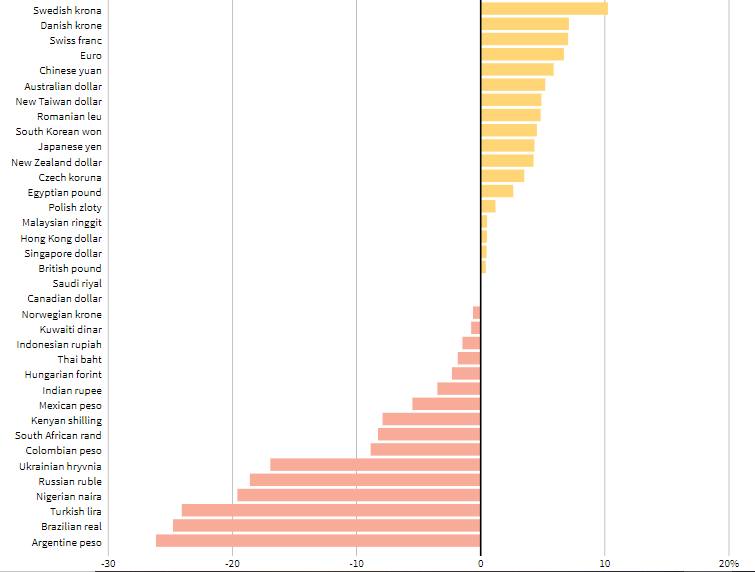

[Back to Table of Contents](#content)

<a id ="comd"></a>
## Commodities

In [9]:
comds= pd.read_excel('World_Indices_List.xlsx', sheet_name='Commodities', header=0)

In [13]:
tdy = str(date.today().day)+'/'+str(date.today().month)+'/'+str(date.today().year)

#def comd_data(commodity):
#    df = investpy.get_commodity_historical_data(commodity=commodity, from_date='01/01/2020', to_date=tdy)['Close']
#    df = pd.DataFrame(df)
#    df.columns = [commodity]
#    return df

#df = pd.DataFrame(index=pd.bdate_range(start='2020-01-01', end=date.today()))
#df.index.name='Date'

#for i in range(len(comds)):
#    df = df.join(comd_data(comds['Commodities'][i]), on='Date')

#df = df.ffill().dropna()
#df.to_excel('comd1.xlsx')

In [14]:
df = pd.read_excel('rawdata.xlsx', sheet_name='Commodities', header=0, index_col=0)

In [15]:
def comd_perf():
    oned_lcl = pd.concat([df.iloc[-1,:], (df.iloc[-1,:]/df.iloc[-6,:]-1),
                            (df.iloc[-1,:]/df.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Price (EOD)', 'Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Commodities'
    return oned_lcl

comd = comd_perf()
comd.drop('Lumber', axis=0, inplace=True)

In [16]:
def comd_hmap(sortby):   
    hmap = comd.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}", 'Chg WTD (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)'], axis=1).columns))
    return hmap
    
interact(comd_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

In [17]:
def perf_comd(timeframe):
    weekly_usd = comd
    if timeframe=='Weekly':
        weekly_usd1 = comd.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).dropna().sort_values(by='Chg WTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values,text=weekly_usd1.index, color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = comd.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).sort_values(by='Chg YTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1.index, color_continuous_scale='rdylgn')

    fig.update_layout(title = 'Commodities ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Return (%)',
                       yaxis_title='Commodities', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Commodity: %{x} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_comd,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS**



- Commodities have witnessed a strong rally during the second half of 2020. The rally has taken the Bloomberg Commodity Index higher by 15% and has been driven by several and to some extent lasting factors. Apart from a natural normalization following the Covid-19 led slump earlier this year, the sector has also benefitted from a strong recovery in Asian demand led by China and weather concerns lifting agriculture commodities. In addition to this investors are also focusing on the impact of fiscal and monetary spending and with that the risk of a weaker dollar and rising inflation.


- **WTI crude** went down 0.4% to USD 45.5 a barrel on Friday, but booked an 8% gain for the week, its fourth consecutive weekly gain supported by hopes that a coronavirus vaccine will be rolled out soon, a possible delay in OPEC+’s planned production increase in January and the formal start of Joe Biden’s transition. However, investors remain worried about near term fuel demand as the number of coronavirus cases continue to rise worldwide. Also, oversupply concerns capped gains as Libya, OPEC member, has added more than 1.1 million bpd of output since early September. Traders will also closely monitor OPEC+ informal online talks which will take place on Saturday ahead of formal meetings scheduled for next week. OPEC+ is debating whether to ease oil output cuts starting from January, as it previously agreed, or to continue producing at the same rate.


- Natural Gas surged 7% this week. A key export terminal for Norway’s natural gas will shut if Saturday’s planned strike goes ahead, cutting supply to Europe, system operator Gassco said on Friday, sending prices higher. The Norwegian Oil and Gas Association (NOG) and Gassco warned on Thursday that the Nyhamna processing facility, which handles about a quarter of Norwegian gas exports, will be closed unless a strike among security guards is called off. Norway, Europe’s second largest gas producer after Russia, says it supplied 22% of European Union demand last year.


- During this time long only portfolios replicating the performance of the major commodity indexes such as the broad Bloomberg Commodity Index and the energy heavy S&P GSCI Commodity Index have been exposed to an annual cost of holding and rolling positions (negative carry). This combined with a generally stronger dollar and limited inflation risks have led to a near decade with small returns. During the past few months however, we have witnessed an emerging change in the attitude towards commodity investments.

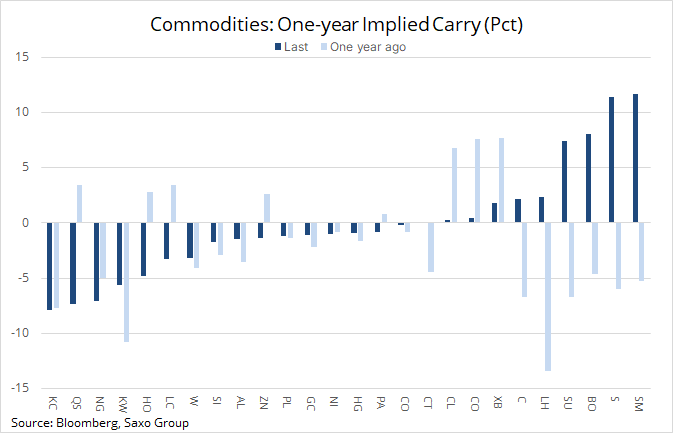

- The agriculture sector has rallied strongly on weather worries and strong export demand, metals have once again been gulped up by China while the energy sector has started to gear up for a post-pandemic recovery in global fuel demand. Precious and semi-precious metals have seen increased demand as a protection against policy mistakes and reflation risks. The impact on the futures forward curves can be seen in the table above.

- Copper extended its rally as global inventories plunged amid China’s economic recovery and as vaccine progress brightened the demand outlook. Global copper stockpiles have slumped about 20% over the past month after holdings in China tumbled, defying the demand weakness that usually sees inventories pile up in winter as manufacturers slow activity. The latest indicators tracked by Bloomberg showed the country’s economic recovery stabilized in November, underpinned by solid global demand for exports ahead of the Christmas period and the stock market’s gain to its highest since 2015.

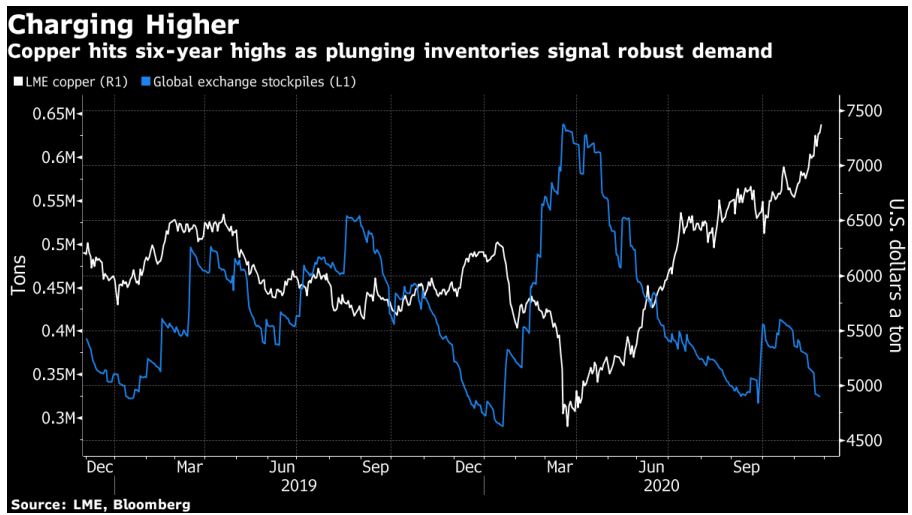

- In Precious Metals, Silver fell 3.7% to USD 22.6 an ounce on Friday and booked a 6.5% plunge on the week, the third consecutive weekly decline and the biggest since late-September. Meanwhile, Gold dropped 1.3% to USD 1,787 an ounce on Friday, remaining close to levels not seen since early-July, and lost 4.5% on the week, the biggest weekly decline since late-September. Palladium & Copper were the best performers rising almost 4% this week, while Platinum rose ~2%.

[Back to Table of Contents](#content)

<a id ="charts"></a>
### CHARTS OF THE WEEK

**RATES KEEP MOVING LOWER POST THE VACCINE NEWS AND NASDAQ LOVES IT**

- Tech is the biggest rates play of them all. Rotation and value, but tech's sensitivity to rates is huge. Nobody has missed the relative bull in tech as part of the big rates moves lower. It is interesting to see everybody has been busy chasing rotation, but not NASDAQ lately, as rates have continued to fade.

As SAXO bank pointed out recently in an article titled ["Growth investing and valuation dynamics under low interest rates"](https://www.home.saxo/content/articles/equities/growth-investing-and-valuation-dynamics-under-low-interest-rates-06082020):

"Microsoft will lose or gain USD 544 Bn of market value on 100 bps move!"

Go figure!
Chart: NDX vs US 10 Year

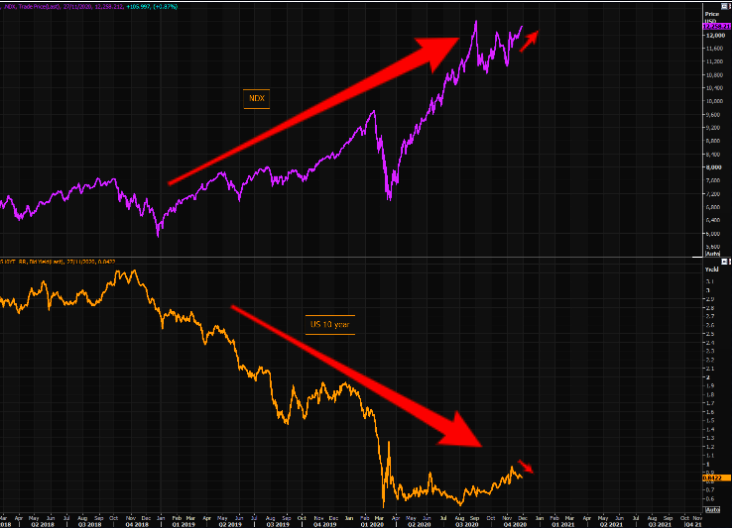

**NASDAQ VERSUS RUSSELL HAS BEEN SIMILAR TO GROWTH VERSUS VALUE**

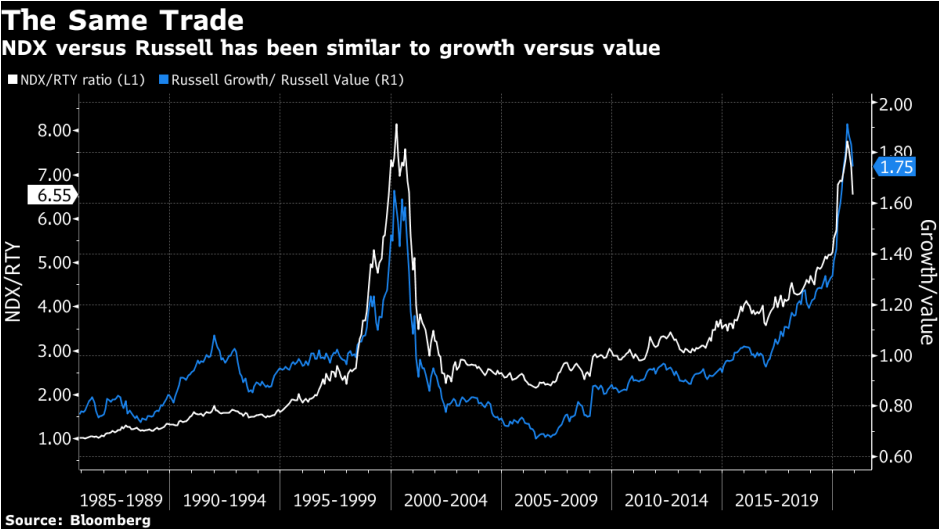

**NDX/RTY RATIO DRAWDOWN**

- The current drawdown (as of Monday’s close) in the NDX/RTY ratio from its two-year high is just over 16%. Going back over the past three and a half decades, there has been only one occasion when such declines exceeded 20% ... and that was the Big Kahuna of the bursting of the dot-com bubble.

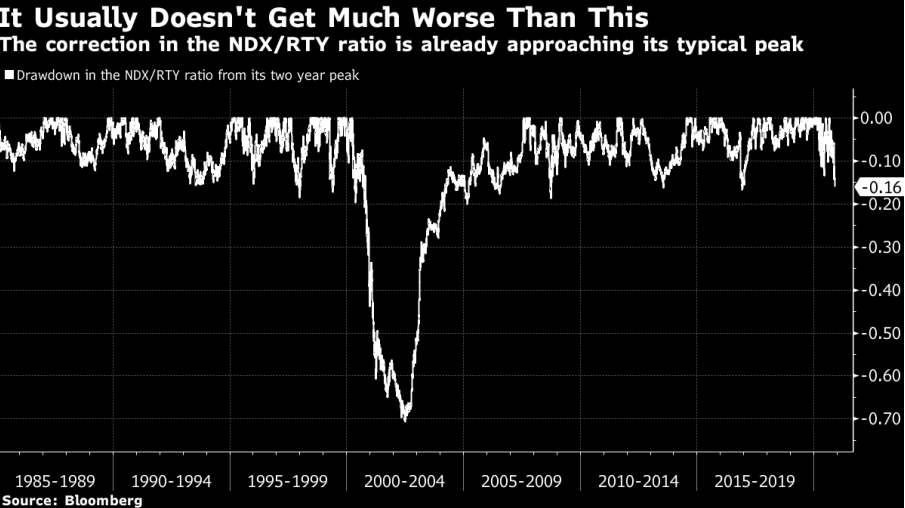

**BUT, GROWTH-VALUE CORRELATION SUGGESTS FURTHER GAINS COULD BE SEEN FOR VALUE**


- That growth/value correlation isn’t at all-time lows, but it is still a lot lower than average. While there have been a few different investment regimes in the growth/value trade over the past few decades, obviously over time growth has outperformed. And so it is interesting to note that a correlation breakdown between the two usually heralds excess returns from value on a tactical (three month) forward looking basis. We are now within the realm where we’d expect that to happen ... even on top of recent performance.

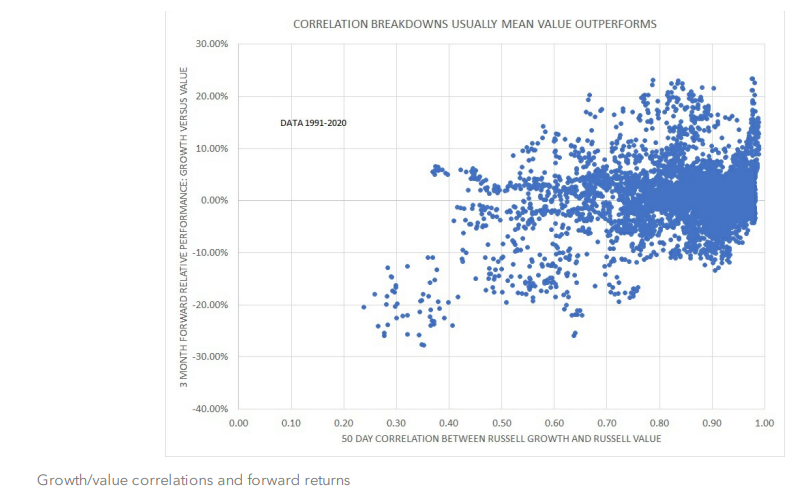

[Back to Table of Contents](#content)

<a id ="eco"></a>

## Key Economic Events Next Week 

In [18]:
HTML("""
<!-- TradingView Widget BEGIN -->
<div class="tradingview-widget-container">
  <div class="tradingview-widget-container__widget"></div>
  <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/markets/currencies/economic-calendar/" rel="noopener" target="_blank"><span class="blue-text">Economic Calendar</span></a> by TradingView</div>
  <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-events.js" async>
  {
  "colorTheme": "light",
  "isTransparent": false,
  "width": "700",
  "height": "600",
  "locale": "en",
  "importanceFilter": "0,1"
}
  </script>
</div>
<!-- TradingView Widget END --> """)

[Back to Table of Contents](#content)